In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
house_df = pd.read_csv("train.csv")

In [3]:
house_df.shape

(1460, 81)

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###### Checking for missing values in the dataframe

In [6]:
missing_values = house_df.isnull().sum()
missing_values[missing_values>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
#As per the Data definitions Fireplace missing values "NA" means there is no fireplace.. this field should be imputed.(replace NA with 0)

In [8]:
house_df=house_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis='columns')

###### Data Imputation for missing values/ Validation

In [9]:
#Replacing NaN values with NA indicating no fireplace
house_df['FireplaceQu'] = house_df['FireplaceQu'].replace(np.nan, 'NA')

In [10]:
house_df.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='LotFrontage'>

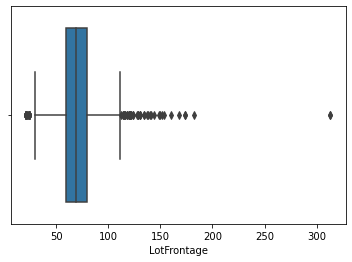

In [11]:
#To understand if there are any outliers in the column
sns.boxplot('LotFrontage', data = house_df)

In [12]:
#imputing the LotFrontage by using median
house_df['LotFrontage'] = house_df['LotFrontage'].fillna(house_df['LotFrontage'].median())

In [13]:
import datetime as dt
current_year = int(dt.datetime.now().year)
current_year

2021

In [14]:
#Converting all the year columns to Age to make our model relevant with age rather than year

In [15]:
house_df['GarageYrBlt'] = current_year-house_df['GarageYrBlt']
house_df['YrSold'] = current_year-house_df['YrSold']
house_df['YearBuilt'] = current_year-house_df['YearBuilt']
house_df['YearRemodAdd'] = current_year-house_df['YearRemodAdd']
                                                        
house_df[['GarageYrBlt','YrSold','YearBuilt','YearRemodAdd']].head(5)

,GarageYrBlt,YrSold,YearBuilt,YearRemodAdd
0,18.0,13,18,18
1,45.0,14,45,45
2,20.0,13,20,19
3,23.0,15,106,51
4,21.0,13,21,21


<AxesSubplot:xlabel='GarageYrBlt'>

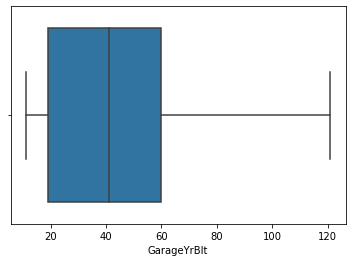

In [16]:
sns.boxplot(house_df['GarageYrBlt'])

In [17]:
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].mean())

In [18]:
print(house_df['MasVnrType'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [19]:
print(house_df[['BsmtQual', 'BsmtCond']].value_counts())

BsmtQual  BsmtCond
TA        TA          596
Gd        TA          580
Ex        TA          110
Gd        Gd           36
TA        Fa           35
Fa        TA           25
TA        Gd           18
Ex        Gd           11
Fa        Fa            8
Gd        Fa            2
Fa        Po            2
dtype: int64


In [20]:
print(house_df['BsmtExposure'].value_counts())

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


In [21]:
print(house_df['BsmtFinType1'].value_counts())

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [22]:
print(house_df['BsmtFinType2'].value_counts())

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [23]:
print(house_df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].value_counts())
#print(house_df['MasVnrArea'].value_counts())

GarageType  GarageFinish  GarageQual  GarageCond
Attchd      RFn           TA          TA            361
Detchd      Unf           TA          TA            293
Attchd      Fin           TA          TA            272
            Unf           TA          TA            218
BuiltIn     Fin           TA          TA             58
            RFn           TA          TA             24
Detchd      RFn           TA          TA             19
            Unf           Fa          Fa             17
                                      TA             16
                          TA          Fa             13
            Fin           TA          TA             12
Basment     Unf           TA          TA              7
CarPort     Unf           TA          TA              7
Basment     RFn           TA          TA              6
Attchd      RFn           Gd          TA              5
BuiltIn     Unf           TA          TA              5
Detchd      Unf           Fa          Po              4

In [24]:
#Replacing the missing values with NA
house_df['BsmtExposure'] = house_df['BsmtExposure'].replace(np.nan, 'NA')
house_df['BsmtFinType2'] = house_df['BsmtFinType2'].replace(np.nan, 'NA')
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].replace(np.nan, 'NA')
house_df['BsmtCond'] = house_df['BsmtCond'].replace(np.nan, 'NA')
house_df['BsmtQual'] = house_df['BsmtQual'].replace(np.nan, 'NA') 
house_df['GarageType'] = house_df['GarageType'].replace(np.nan, 'NA')
house_df['GarageFinish'] = house_df['GarageFinish'].replace(np.nan, 'NA')
house_df['GarageQual'] = house_df['GarageQual'].replace(np.nan, 'NA')
house_df['GarageCond'] = house_df['GarageCond'].replace(np.nan, 'NA')
house_df['MasVnrType'] = house_df['MasVnrType'].replace(np.nan, 'None')

#imputing this field on mode value
house_df['Electrical'] = house_df['Electrical'].replace(np.nan, 'SBrkr')

In [25]:
missing_values = house_df.isnull().sum()
missing_values[missing_values>0]

MasVnrArea    8
dtype: int64

In [26]:
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].median())

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

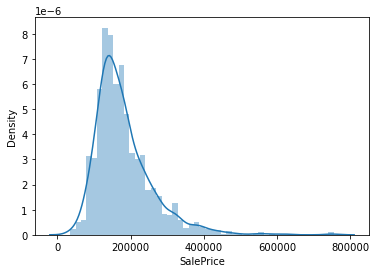

In [27]:
sns.distplot(house_df['SalePrice'])

In [28]:
house_df['log_Sales']=np.log(house_df['SalePrice'])

<AxesSubplot:xlabel='log_Sales', ylabel='Density'>

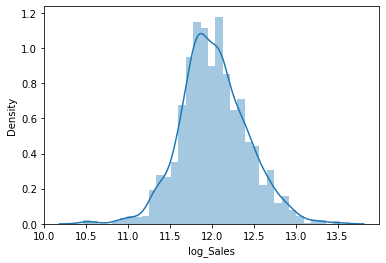

In [29]:
sns.distplot(house_df['log_Sales'])

In [30]:
### Checking the column types:

In [31]:
house_df.select_dtypes(['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'log_Sales'],
      dtype='object')

In [32]:
#ID has no data significance ;it is only a serial number.. Dropping this column
house_df.drop('Id',axis=1,inplace=True)
house_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_Sales
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,13,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,14,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,13,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,15,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,13,WD,Normal,250000,12.429216


# Checking for the outliers

In [33]:
house_numeric = house_df.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'YrSold'], axis=1)
house_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_Sales
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,49.732192,36.134247,103.117123,443.639726,46.549315,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,13.184247,180921.195890,12.024051
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.399452
min,20.000000,21.000000,1300.000000,1.000000,1.000000,11.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,34900.000000,10.460242
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,21.000000,17.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,12.000000,129975.000000,11.775097
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,48.000000,27.000000,0.000000,383.500000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,13.000000,163000.000000,12.001505
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,67.000000,54.000000,164.250000,712.250000,0.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,14.000000,214000.000000,12.273731
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,96.100000,71.000000,335.000000,1065.500000,117.200000,...,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,15.000000,278000.000000,12.535376
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,105.000000,71.000000,456.000000,1274.000000,396.200000,...,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,15.000000,326100.000000,12.694958
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,121.820000,71.000000,791.280000,1572.410000,830.380000,...,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,15.000000,442567.010000,13.000323


(1452, 77)

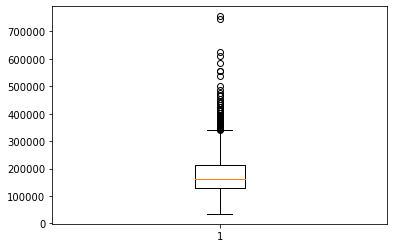

In [34]:
house=house_df
plt.boxplot(house['SalePrice'])
Q1 = house['SalePrice'].quantile(0.1)
Q3 = house['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house['SalePrice'] <= Q3 + 1.5*IQR)]
house.shape

In [35]:
house=house[house['SalePrice']<270000]
house.shape

(1290, 77)

<AxesSubplot:xlabel='SalePrice'>

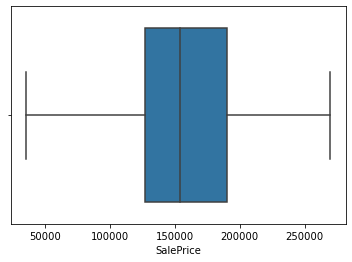

In [36]:
sns.boxplot(house['SalePrice'])

In [37]:
# pairwise scatter plot to explore Basement attributes

<Figure size 1440x720 with 0 Axes>

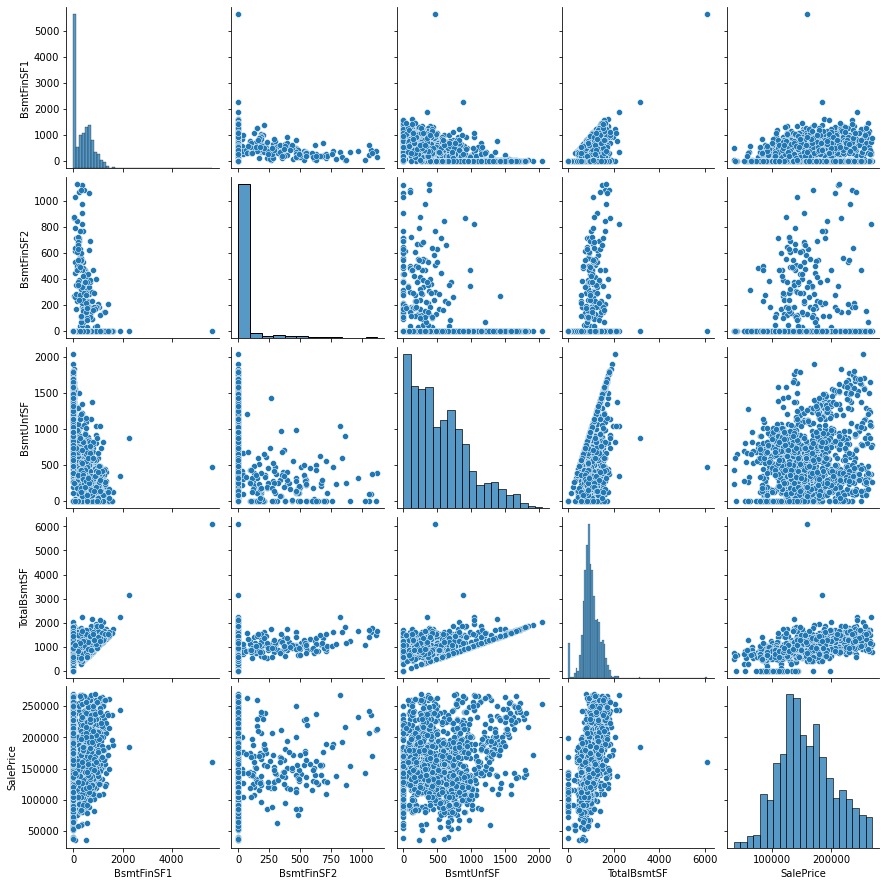

In [38]:
plt.figure(figsize=(20, 10))
sns.pairplot(house[['BsmtQual','BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SalePrice']])
plt.show()

In [39]:
house=house.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

From the graph, 

1. SalePrice has almost good linear relation ship with  'BsmtFinSF2', 'BsmtUnfSF' 'TotalBsmtSF'
2. TotalBsmtSF has almost linear correlation with all the variables
3. We can drop the other variables and consider only TotalBsmtSF as our independant variable for the analysis

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

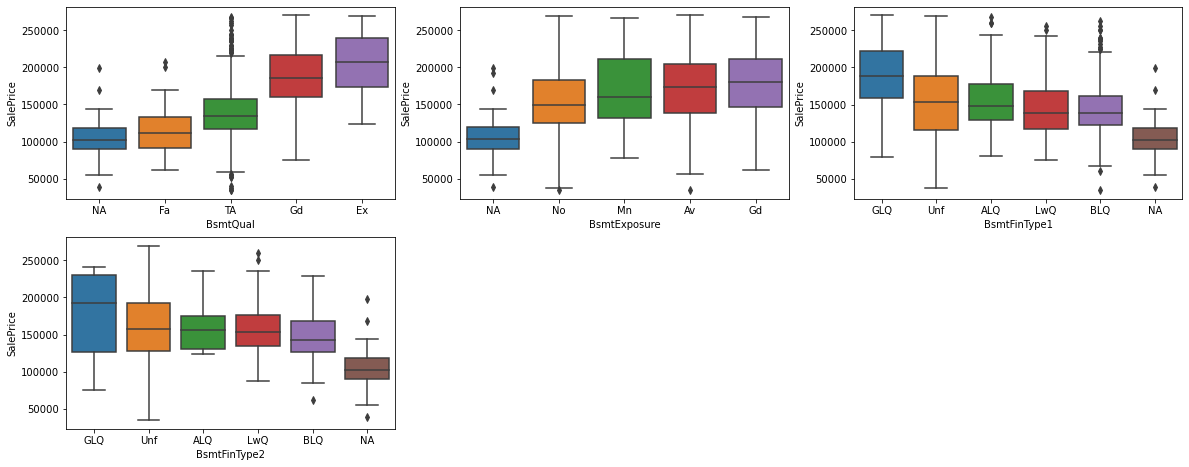

In [40]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', order=['NA', 'Fa', 'TA', 'Gd', 'Ex'], data = house)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice',order=['NA', 'No', 'Mn', 'Av', 'Gd'], data = house)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', order=['GLQ','Unf','ALQ',  'LwQ', 'BLQ', 'NA'], data = house)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', order=['GLQ','Unf','ALQ',  'LwQ', 'BLQ', 'NA'], data = house)

BsmtQual & BsmtExposure has considerable linearity

BsmtFinType1, BsmtFinType2 are exhibiting Linear relationship even though we cannot guarantee how linear.

Converting them to categorical to visualize the lienarity

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

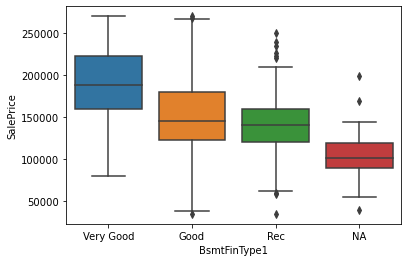

In [41]:
house['BsmtFinType1'].replace({'GLQ':'Very Good'},inplace=True)
house['BsmtFinType1'].replace({'ALQ':'Good'},inplace=True)
house['BsmtFinType1'].replace({'LwQ':'Good'},inplace=True)
house['BsmtFinType1'].replace({'BLQ':'Good'},inplace=True)
house['BsmtFinType1'].replace({'Unf':'Good'},inplace=True)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = house)

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

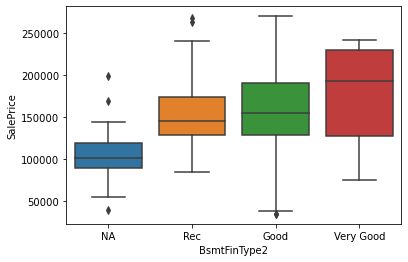

In [42]:
house['BsmtFinType2'].replace({'GLQ':'Very Good'},inplace=True)
house['BsmtFinType2'].replace({'ALQ':'Good'},inplace=True)
house['BsmtFinType2'].replace({'LwQ':'Good'},inplace=True)
house['BsmtFinType2'].replace({'BLQ':'Good'},inplace=True)
house['BsmtFinType2'].replace({'Unf':'Good'},inplace=True)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', order=['NA', 'Rec', 'Good', 'Very Good'], data = house)

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

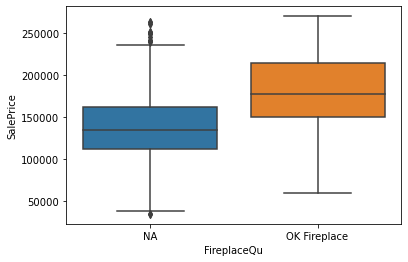

In [43]:
house['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)

#Imputing level values of FireplaceQu
house['FireplaceQu'].replace({'Fa':'OK Fireplace'},inplace=True)
house['FireplaceQu'].replace({'TA':'OK Fireplace'},inplace=True)
house['FireplaceQu'].replace({'Gd':'OK Fireplace'},inplace=True)
house['FireplaceQu'].replace({'Ex':'OK Fireplace'},inplace=True)
house['FireplaceQu'].replace({'Po':'OK Fireplace'},inplace=True)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = house)

In [44]:
Porch=house[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch', 'SalePrice']]

print(Porch.head())
print(Porch.info())

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  SalePrice
0           61              0          0            0     208500
1            0              0          0            0     181500
2           42              0          0            0     223500
3           35            272          0            0     140000
4           84              0          0            0     250000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OpenPorchSF    1290 non-null   int64
 1   EnclosedPorch  1290 non-null   int64
 2   3SsnPorch      1290 non-null   int64
 3   ScreenPorch    1290 non-null   int64
 4   SalePrice      1290 non-null   int64
dtypes: int64(5)
memory usage: 100.5 KB
None


<Figure size 1440x720 with 0 Axes>

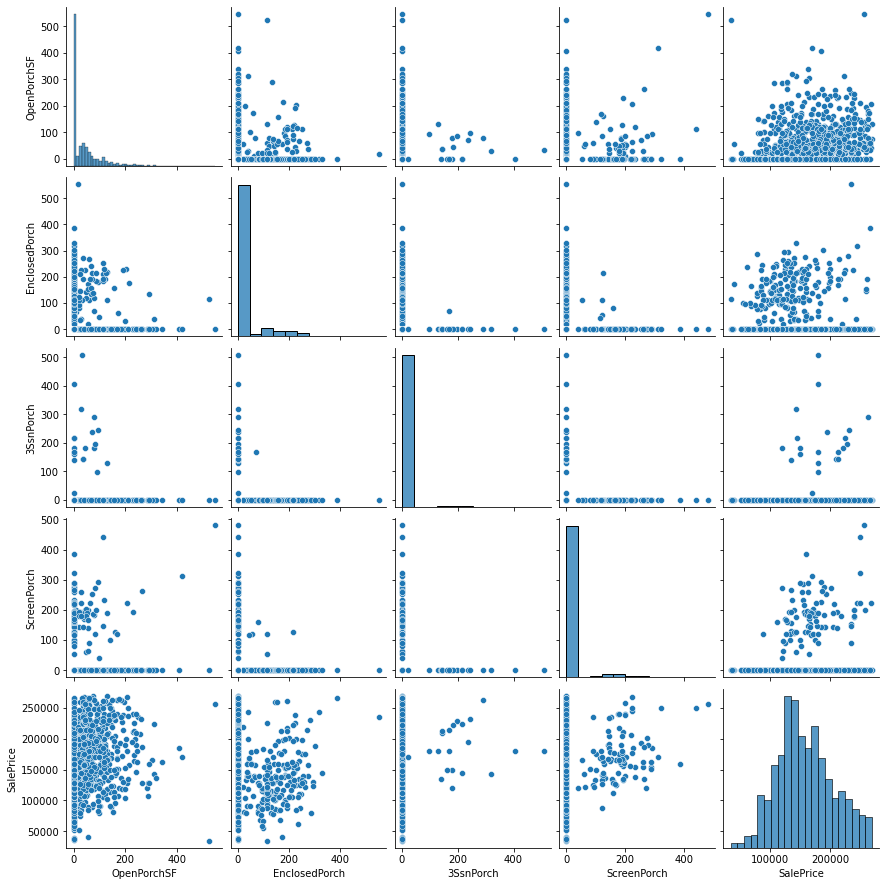

In [45]:
# pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(Porch)
plt.show()

OpenPorch and Enclosed Porch have near linear relationship with SalePrice

In [46]:
house=house.drop(['EnclosedPorch', '3SsnPorch'], axis=1)

In [47]:
print(house[house['GarageYrBlt']-house['YearBuilt']<=1])
print(house.shape)
#Almost 1277 rows show garage year and year built are same
#Dropping the GarageYrBlt

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF

In [48]:
house=house.drop('GarageYrBlt', axis=1)

In [49]:
print(house['MasVnrType'].value_counts())


None       837
BrkFace    364
Stone       75
BrkCmn      14
Name: MasVnrType, dtype: int64


In [50]:
print(house[house['MasVnrType']=='None'].MasVnrArea.value_counts())

0.0      832
1.0        2
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64


In [51]:
#These values need to be removed as there is Area but there is no Masonary type
house1=house[house['MasVnrType']=='None']
house1[house[house['MasVnrType']=='None'].MasVnrArea>0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_Sales
624,60,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,147,0,0,11,15,WD,Normal,165150,12.014609
773,20,RL,70.0,10150,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,14,COD,Normal,114500,11.648330
1230,90,RL,69.0,18890,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,24,0,0,8300,8,14,WD,Normal,190000,12.154779
1300,60,RL,69.0,10762,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,5,12,WD,Normal,225000,12.323856
1334,160,RM,24.0,2368,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,5,12,WD,Normal,125000,11.736069


In [52]:
#dropping these rows from the dataset
house.drop([624, 773, 1230, 1300, 1334], axis=0, inplace=True)

<AxesSubplot:xlabel='MasVnrArea'>

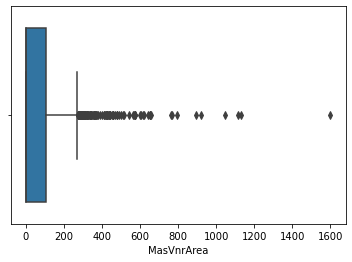

In [53]:
sns.boxplot(house['MasVnrArea'])

In [54]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1285.0,57.926070,43.638971,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1285.0,68.108949,21.430042,21.000000,60.000000,69.000000,75.000000,313.000000
LotArea,1285.0,9754.568093,6727.797995,1300.000000,7200.000000,9100.000000,11075.000000,164660.000000
OverallQual,1285.0,5.819455,1.177447,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1285.0,5.608560,1.126744,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1285.0,53.039689,29.795630,12.000000,24.000000,52.000000,71.000000,149.000000
YearRemodAdd,1285.0,38.345525,20.793050,11.000000,18.000000,32.000000,57.000000,71.000000
MasVnrArea,1285.0,75.922957,147.683624,0.000000,0.000000,0.000000,108.000000,1600.000000
TotalBsmtSF,1285.0,985.810895,387.798802,0.000000,773.000000,941.000000,1199.000000,6110.000000
1stFlrSF,1285.0,1099.174319,339.853254,334.000000,864.000000,1041.000000,1298.000000,4692.000000


In [55]:
house.MSSubClass.astype('object')

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1285, dtype: object

In [56]:
house.MSSubClass.value_counts()

20     465
60     224
50     138
120     74
30      69
160     62
70      58
80      55
90      51
190     30
85      20
75      13
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

###### The value of MSSubclass has meaning as per data def is dwelling type:

##### The value has no numerical significance with the data model. this needs to be converted to Catergorical        

In [57]:
print(house_df['OverallQual'].value_counts())
print(house_df['OverallCond'].value_counts())

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


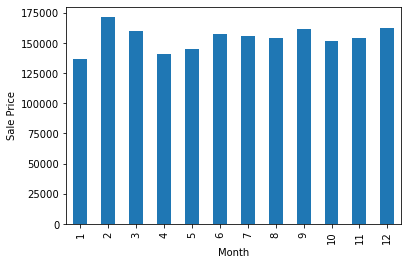

In [58]:
house.groupby('MoSold').SalePrice.median().plot.bar()
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show()

In [59]:
#Here, we do not see any monthly price pattern.So dropping this variable from our dataset
house.drop('MoSold',axis=1,inplace=True)

In [60]:
#Checking for data anamolies
house[house.YearBuilt<house.YrSold].YearBuilt 
#house_df.YearRemodAdd>house_df.YrSold).sum()

Series([], Name: YearBuilt, dtype: int64)

In [61]:
house[house.YearRemodAdd>house.YearBuilt].YearRemodAdd

Series([], Name: YearRemodAdd, dtype: int64)

In [62]:
house[house.YearRemodAdd<house.YrSold].YearRemodAdd

523    13
Name: YearRemodAdd, dtype: int64

In [63]:
#Removing this data as this is inevitable
house=house[house.YearRemodAdd>=house.YrSold]

In [64]:
cols=house.select_dtypes(['int64','float64','object']).columns
skewed_cols={}
for col in cols:
    if max(list(house_df[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))>=0.99:
        skewed_cols[col]=round(max(list(house_df[col].value_counts(normalize=True).sort_values(ascending=False).head(1))),2)
pd.DataFrame({'Features':list(skewed_cols.keys()),'Percentage':list(skewed_cols.values())})

,Features,Percentage
0,Street,1.0
1,Utilities,1.0
2,PoolArea,1.0


In [65]:
#Dropping these variables as they are not linearly related with the Saleprice. They have 85% of the same value. and donot contribute to data model
house.drop(list(skewed_cols.keys()),axis=1,inplace=True)

In [66]:
house.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,log_Sales
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,61,0,0,13,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Y,298,0,0,0,14,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,42,0,0,13,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Y,0,35,0,0,15,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,Y,192,84,0,0,13,WD,Normal,250000,12.429216


In [67]:
#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['MSZoning']= house['MSZoning'].astype('object')
house['LotShape']= house['LotShape'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

<AxesSubplot:>

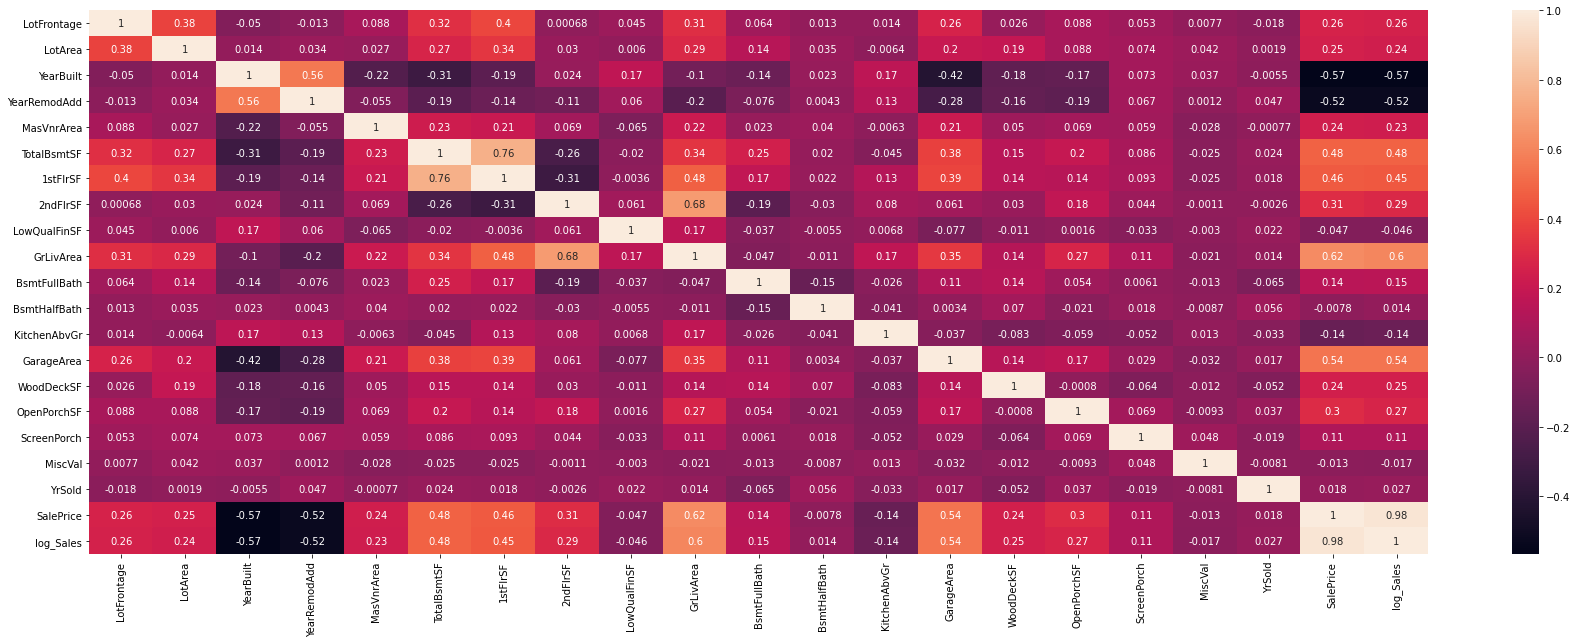

In [68]:
plt.figure(figsize=(30,10))
sns.heatmap(house.corr(),annot=True)


1. Positive Correlation
    LotArea MasVnrArea TotalBsmtSF 1stFlrSF GrLivArea GarageArea
2. Negative correlation 
    YearBuilt YearRemodAdd LowQualSF KitchenAbvGr EnclosedPorch MiscVal

In [69]:
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')

In [70]:
# creating dummy variables for categorical variables
# subset all categorical variables
house_categorical = house.select_dtypes(include=['object'])
house_categorical.head()
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [71]:
house_df1 = house

In [72]:
house_df1 = house_df1.drop(list(house_categorical.columns), axis=1)

In [73]:
house_df1 = pd.concat([house_df1, house_dummies], axis=1)

In [74]:
house_df1.shape

(1284, 279)

In [75]:
house_df1

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,18,18,196.0,856,856,854,0,1710,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,45,45,0.0,1262,1262,0,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,20,19,162.0,920,920,866,0,1786,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,106,51,0.0,756,961,756,0,1717,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,21,21,350.0,1145,1145,1053,0,2198,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,22,21,0.0,953,953,694,0,1647,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,43,33,119.0,1542,2073,0,0,2073,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,80,15,0.0,1152,1188,1152,0,2340,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,71,25,0.0,1078,1078,0,0,1078,...,0,0,0,0,1,0,0,0,1,0


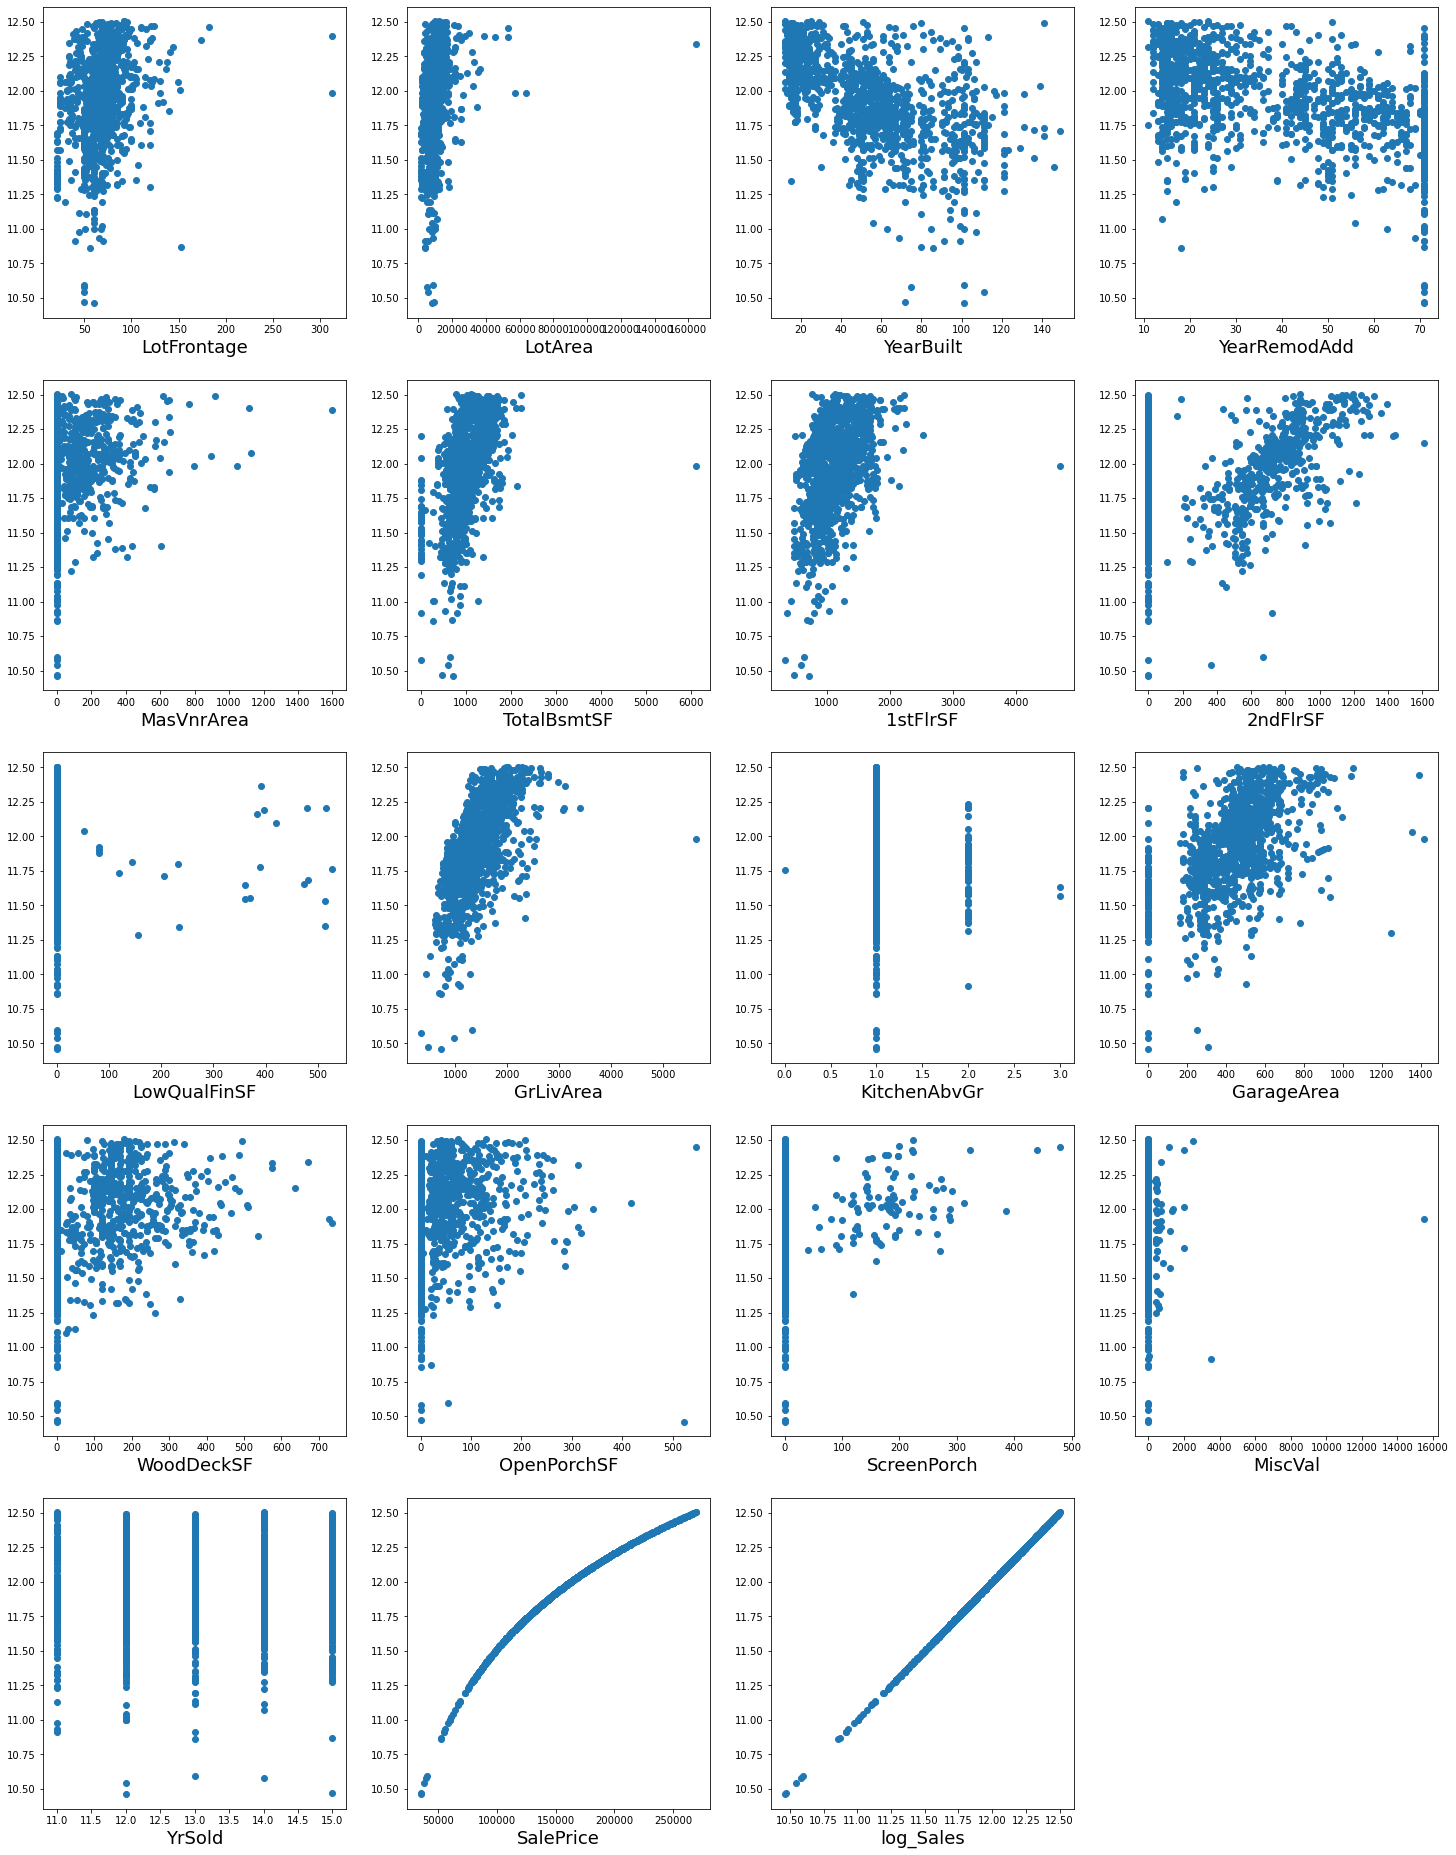

In [76]:
num_col=list(house_df1.select_dtypes(['int64','float64']))
plt.figure(figsize=(25,40))
for m,n in enumerate(num_col):
    plt.subplot(6,4,(m+1))
    plt.scatter(house_df1[n],house_df1['log_Sales'])
    plt.xlabel(n,fontsize=18)
plt.show()

### Data Modelling

In [77]:
house_df1.select_dtypes(['int64','float64']).columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'KitchenAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'ScreenPorch', 'MiscVal', 'YrSold', 'SalePrice', 'log_Sales'],
      dtype='object')

In [78]:
house_df1['SaleType_ConLw'].dtype

dtype('uint8')

In [79]:
cols=house_df1.select_dtypes(['int64','float64','object', 'uint8']).columns
skewed_cols={}
for col in cols:
    if max(list(house_df1[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))>=0.85:
        skewed_cols[col]=round(max(list(house_df1[col].value_counts(normalize=True).sort_values(ascending=False).head(1))),2)
pd.DataFrame({'Features':list(skewed_cols.keys()),'Percentage':list(skewed_cols.values())})

,Features,Percentage
0,LowQualFinSF,0.98
1,KitchenAbvGr,0.95
2,ScreenPorch,0.93
3,MiscVal,0.96
4,MSSubClass_30,0.95
...,...,...
204,SaleType_WD,0.89
205,SaleCondition_AdjLand,1.00
206,SaleCondition_Alloca,0.99
207,SaleCondition_Family,0.98


In [80]:
#Eliminating data which is 85% skewed
house_df1.drop(list(skewed_cols.keys()),axis=1,inplace=True)

In [81]:
var=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF',
#     'ScreenPorch', 'MiscVal', 'KitchenAbvGr','LowQualFinSF',
     'YrSold', 'SalePrice', 'log_Sales']

In [137]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)

house_df2=house_df1


In [138]:
df_train, df_test = train_test_split(house_df2, train_size=0.7, test_size=0.3, random_state=100)

In [139]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_train[var]=scaler.fit_transform(df_train[var])
#convert the scalled data array into dataframe
#df_train[var]=pd.DataFrame(df_train_transformed, columns=df_train.columns)
df_test[var]=scaler.transform(df_test[var])
#convert the scalled data array into dataframe
#df_test_transformed=pd.DataFrame(df_test_transformed, columns=df_test.columns)

In [140]:
y_train=df_train['SalePrice']
X_train=df_train.drop(['SalePrice', 'log_Sales'], axis=1)
y_test=df_test['SalePrice']
X_test=df_test.drop(['SalePrice', 'log_Sales'], axis=1)

In [141]:
from sklearn.metrics import r2_score

In [142]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_train_pred= lm.predict(X_train)
y_test_pred= lm.predict(X_test)
print('train R2 score is',(r2_score(y_train,y_train_pred)))
print('test R2 score is',(r2_score(y_test,y_test_pred)))

train R2 score is 0.8128512263657708
test R2 score is 0.7838208820055346


In [143]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)
lr_mdl = lr.fit()
lr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     52.95
Date:                Mon, 26 Jul 2021   Prob (F-statistic):          2.36e-255
Time:                        14:19:35   Log-Likelihood:                -521.75
No. Observations:                 898   AIC:                             1181.
Df Residuals:                     829   BIC:                             1513.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7451      0.239     -3.112      0.002      -1.215      -0.275
LotFrontage                 -0.0093      0.020     -0.475      0.635      -0.048       0.029
LotArea                      0.0338      0.019      1.789      0.074      -0.003       0.071
YearBuilt                   -0.0855      0.038     -2.242      0.025      -0.160      -0.011
YearRemodAdd                -0.0783      0.024     -3.237      0.001      -0.126      -0.031
MasVnrArea                   0.0177      0.022      0.792      0.428      -0.026       0.062
TotalBsmtSF                  0.0449      0.030      1.503      0.133      -0.014       0.103
1stFlrSF                     0.0871      0.125      0.698      0.485      -0.158       0.332
2ndFlrSF                     0.2140      0.145      1.479      0.140      -0.070       0.498
GrLivArea                    0.1719      0.154      1.116      0.265      -0.130       0.474
GarageArea                   0.1220      0.024      5.108      0.000       0.075       0.169
WoodDeckSF                   0.0143      0.017      0.855      0.393      -0.019       0.047
OpenPorchSF                  0.0423      0.017      2.478      0.013       0.009       0.076
YrSold                       0.0167      0.016      1.040      0.298      -0.015       0.048
MSSubClass_60               -0.0663      0.078     -0.849      0.396      -0.220       0.087
MSZoning_RL                 -0.0885      0.074     -1.201      0.230      -0.233       0.056
MSZoning_RM                 -0.3564      0.082     -4.343      0.000      -0.517      -0.195
LotShape_Reg                -0.0829      0.035     -2.341      0.019      -0.152      -0.013
LotConfig_Inside            -0.0776      0.036     -2.140      0.033      -0.149      -0.006
Neighborhood_NAmes          -0.0182      0.050     -0.365      0.715      -0.116       0.080
HouseStyle_1Story            0.1394      0.061      2.271      0.023       0.019       0.260
HouseStyle_2Story           -0.1119      0.075     -1.499      0.134      -0.258       0.035
OverallQual_5               -0.0926      0.051     -1.804      0.072      -0.193       0.008
OverallQual_6               -0.0107      0.052     -0.205      0.838      -0.114       0.092
OverallQual_7                0.1576      0.055      2.868      0.004       0.050       0.265
OverallCond_5                0.0338      0.058      0.578      0.563      -0.081       0.149
OverallCond_6                0.1906      0.059      3.217      0.001       0.074       0.307
OverallCond_7                0.2963      0.060      4.951      0.000       0.179       0.414
RoofStyle_Gable             -0.2638      0.097     -2.731      0.006      -0.453      -0.074
RoofStyle_Hip               -0.1964      0.103     -1.905      0.057      -0.399       0.006
Exterior1st_Hd

###### The Model built through the Linear Regression is very complex and has more coefficient. 

We have to apply Lasso & Ridge Regression to get the bext model which is simple and efficient

### Ridge Regression

In [144]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()
folds=5
ridge_model_cv=GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

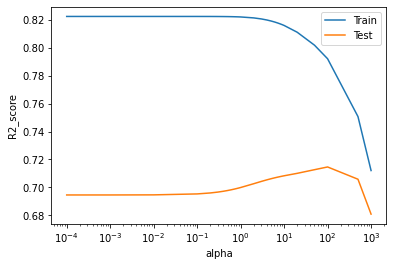

In [145]:
cv_results= pd.DataFrame(ridge_model_cv.cv_results_)
#plotting R2 score vs alpha value
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.81
test R2 score is 0.8


In [147]:
alpha=0.001
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))
print(ridge.coef_)

train R2 score is 0.81
test R2 score is 0.78
[-0.00927015  0.03384839 -0.08546619 -0.07833147  0.01774592  0.04486465
  0.087083    0.21396023  0.17188036  0.12199913  0.01431838  0.04225518
  0.01675128 -0.06628076 -0.08852737 -0.35636272 -0.082899   -0.07762759
 -0.01822111  0.13936682 -0.11186036 -0.09257676 -0.01072412  0.15757061
  0.033802    0.19063291  0.2963068  -0.26378192 -0.19636646 -0.1010099
 -0.04468391 -0.29523012 -0.04406528  0.04181433 -0.00924998  0.34565244
 -0.03055202 -0.01082964  0.77031602  0.56272083  0.03988225  0.1143635
  0.24315828  0.18389684 -0.0584226   0.11442812  0.00194288 -0.0869967
  0.10699035 -0.11645485 -0.06210729  0.06967915  0.02047975  0.00301202
 -0.04643127 -0.152184   -0.0659266   0.01431624  0.05555133 -0.12849222
  0.32673552  0.30997869  0.18778861  0.00685171 -0.06809489 -0.08261537
 -0.08639743  0.19555932]


In [183]:
print("\n The best estimator across ALL searched params:\n",
          ridge_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          ridge_model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          ridge_model_cv.best_params_)


 The best estimator across ALL searched params:
 Ridge(alpha=100)

 The best score across ALL searched params:
 0.7146331801573758

 The best parameters across ALL searched params:
 {'alpha': 100}


In [184]:
#double the value of alpha
alpha=0.001
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))
print(ridge.coef_)

train R2 score is 0.81
test R2 score is 0.78
[-0.00927015  0.03384839 -0.08546619 -0.07833147  0.01774592  0.04486465
  0.087083    0.21396023  0.17188036  0.12199913  0.01431838  0.04225518
  0.01675128 -0.06628076 -0.08852737 -0.35636272 -0.082899   -0.07762759
 -0.01822111  0.13936682 -0.11186036 -0.09257676 -0.01072412  0.15757061
  0.033802    0.19063291  0.2963068  -0.26378192 -0.19636646 -0.1010099
 -0.04468391 -0.29523012 -0.04406528  0.04181433 -0.00924998  0.34565244
 -0.03055202 -0.01082964  0.77031602  0.56272083  0.03988225  0.1143635
  0.24315828  0.18389684 -0.0584226   0.11442812  0.00194288 -0.0869967
  0.10699035 -0.11645485 -0.06210729  0.06967915  0.02047975  0.00301202
 -0.04643127 -0.152184   -0.0659266   0.01431624  0.05555133 -0.12849222
  0.32673552  0.30997869  0.18778861  0.00685171 -0.06809489 -0.08261537
 -0.08639743  0.19555932]


######  LASSO REGRESSION

In [196]:
lasso=Lasso()
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}
folds=4
lasso_model_cv=GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='r2',
                            cv=folds,
                            return_train_score=True,
                           verbose=1)
lasso_model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100, 500, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

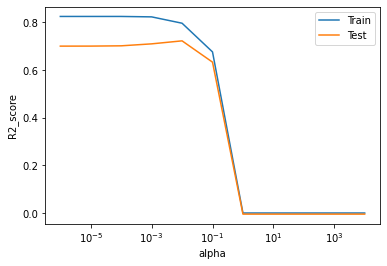

In [197]:
cv_results= pd.DataFrame(lasso_model_cv.cv_results_)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [198]:
alph= 0.0001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.81
test R2 score is 0.78


In [199]:
alph= 0.0002
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.81
test R2 score is 0.79


In [200]:
alph=0.01
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.79
test R2 score is 0.8


In [165]:
alph=0.02
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.77
test R2 score is 0.78


In [ ]:
print(lasso.coef_)

In [201]:
print("\n The best estimator across ALL searched params:\n",
          lasso_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          lasso_model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          lasso_model_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.01)

 The best score across ALL searched params:
 0.7227739498880865

 The best parameters across ALL searched params:
 {'alpha': 0.01}


In [202]:
print(lasso.coef_)

[-0.00000000e+00  3.86132126e-02 -1.09063704e-01 -1.02451127e-01
  4.03425787e-03  6.35852189e-02  0.00000000e+00  4.11886419e-05
  3.30181559e-01  1.31048273e-01  1.21056860e-02  3.84396752e-02
  2.34689089e-03  0.00000000e+00  0.00000000e+00 -2.02085392e-01
 -6.38078278e-02 -1.61524370e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -5.21813396e-02  0.00000000e+00  1.44054711e-01
 -0.00000000e+00  7.41465698e-02  1.55431150e-01 -4.03301299e-03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.01650756e-02
  0.00000000e+00 -0.00000000e+00  2.17300822e-01 -0.00000000e+00
 -0.00000000e+00  4.96038523e-02  1.01496712e-01  0.00000000e+00
 -0.00000000e+00  4.60968370e-02 -0.00000000e+00 -6.07048540e-02
  9.18797115e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.05936112e-01 -9.77317449e-03
 -0.00000000e+00 -0.00000000e+00  1.35751687e-02  0.00000000e+00
  2.06783901e-01  1.74174

In [203]:
lasso_dict=dict(zip(X_train.columns,lasso.coef_))
final_dict={}
for i in lasso_dict:
    if lasso_dict[i]!=0:
        final_dict[i]= round(lasso_dict[i],3)    #rounding coefficient to 3 significant digits
print(final_dict)
print(len(final_dict))

{'LotArea': 0.039, 'YearBuilt': -0.109, 'YearRemodAdd': -0.102, 'MasVnrArea': 0.004, 'TotalBsmtSF': 0.064, '2ndFlrSF': 0.0, 'GrLivArea': 0.33, 'GarageArea': 0.131, 'WoodDeckSF': 0.012, 'OpenPorchSF': 0.038, 'YrSold': 0.002, 'MSZoning_RM': -0.202, 'LotShape_Reg': -0.064, 'LotConfig_Inside': -0.016, 'OverallQual_5': -0.052, 'OverallQual_7': 0.144, 'OverallCond_6': 0.074, 'OverallCond_7': 0.155, 'RoofStyle_Gable': -0.004, 'Exterior2nd_VinylSd': 0.01, 'ExterQual_Gd': 0.217, 'Foundation_PConc': 0.05, 'BsmtQual_Gd': 0.101, 'BsmtFinType1_Very Good': 0.046, 'HeatingQC_TA': -0.061, 'BsmtFullBath_1': 0.092, 'KitchenQual_Gd': 0.106, 'KitchenQual_TA': -0.01, 'TotRmsAbvGrd_7': 0.014, 'FireplaceQu_OK Fireplace': 0.207, 'GarageType_Attchd': 0.174, 'GarageFinish_Unf': -0.013, 'SaleCondition_Normal': 0.101}
33


In [204]:
import operator
final_dict= dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))
#printing the final model equation
a= ' + '.join(([str(b)+' X '+str(a) for a,b in final_dict.items()]))
print("Sales Price = {0}+ [ {1} ]".format(round(lasso.intercept_,3),a))

Sales Price = -0.452+ [ 0.33 X GrLivArea + 0.217 X ExterQual_Gd + 0.207 X FireplaceQu_OK Fireplace + 0.174 X GarageType_Attchd + 0.155 X OverallCond_7 + 0.144 X OverallQual_7 + 0.131 X GarageArea + 0.106 X KitchenQual_Gd + 0.101 X BsmtQual_Gd + 0.101 X SaleCondition_Normal + 0.092 X BsmtFullBath_1 + 0.074 X OverallCond_6 + 0.064 X TotalBsmtSF + 0.05 X Foundation_PConc + 0.046 X BsmtFinType1_Very Good + 0.039 X LotArea + 0.038 X OpenPorchSF + 0.014 X TotRmsAbvGrd_7 + 0.012 X WoodDeckSF + 0.01 X Exterior2nd_VinylSd + 0.004 X MasVnrArea + 0.002 X YrSold + 0.0 X 2ndFlrSF + -0.004 X RoofStyle_Gable + -0.01 X KitchenQual_TA + -0.013 X GarageFinish_Unf + -0.016 X LotConfig_Inside + -0.052 X OverallQual_5 + -0.061 X HeatingQC_TA + -0.064 X LotShape_Reg + -0.102 X YearRemodAdd + -0.109 X YearBuilt + -0.202 X MSZoning_RM ]


Text(0.5, 0, 'error')

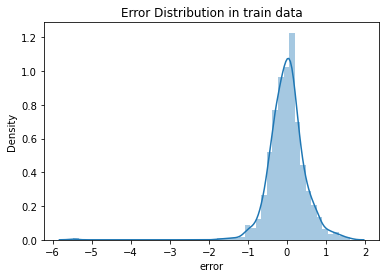

In [157]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Distribution in train data')
plt.xlabel('error')

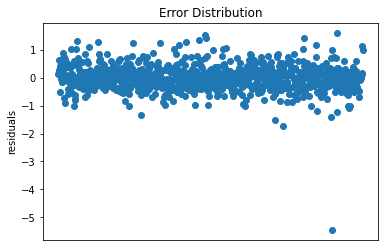

In [158]:
x= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x,y_train-y_train_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

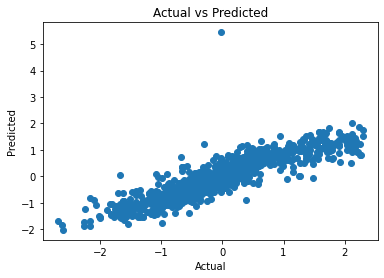

In [159]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


Text(0.5, 0, 'error')

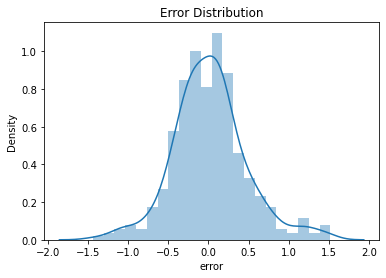

In [160]:
sns.distplot(y_test-y_test_pred)
plt.title('Error Distribution')
plt.xlabel('error')

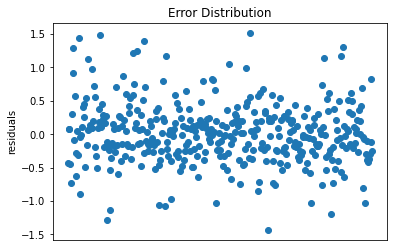

In [161]:
x= [i for i in range (1,y_test.shape[0]+1,1)]
plt.scatter(x,y_test-y_test_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

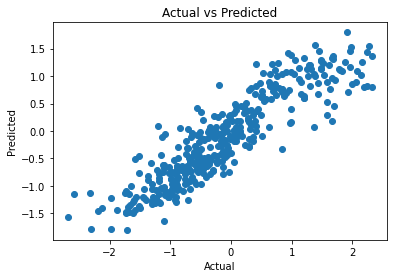

In [162]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

All the error terms are distributed as per our linear model

This Lasso model increased the performance of our model

In [170]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0368
1,YearBuilt,-0.1353
2,YearRemodAdd,-0.1244
3,TotalBsmtSF,0.0611
4,GrLivArea,0.3476
5,GarageArea,0.1307
6,WoodDeckSF,0.0096
7,OpenPorchSF,0.0330
8,MSZoning_RM,-0.1298
9,LotShape_Reg,-0.0491


In [172]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

X_train_lasso = X_train[lasso_df.Features]
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [173]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotFrontage': 0.0,
 'LotArea': 0.03680159728998378,
 'YearBuilt': -0.13533520549805192,
 'YearRemodAdd': -0.12437196689671834,
 'MasVnrArea': 0.0,
 'TotalBsmtSF': 0.06114989604136669,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.3475562401151986,
 'GarageArea': 0.13071682842764518,
 'WoodDeckSF': 0.009623565261636595,
 'OpenPorchSF': 0.03299381949991574,
 'YrSold': 0.0,
 'MSSubClass_60': 0.0,
 'MSZoning_RL': 0.0,
 'MSZoning_RM': -0.12979895216062973,
 'LotShape_Reg': -0.04905653152503279,
 'LotConfig_Inside': -0.0,
 'Neighborhood_NAmes': -0.0,
 'HouseStyle_1Story': 0.0,
 'HouseStyle_2Story': 0.0,
 'OverallQual_5': -0.025828568968854392,
 'OverallQual_6': 0.0,
 'OverallQual_7': 0.10423447075019081,
 'OverallCond_5': -0.0,
 'OverallCond_6': 0.0,
 'OverallCond_7': 0.028190557453760597,
 'RoofStyle_Gable': -0.0,
 'RoofStyle_Hip': 0.0,
 'Exterior1st_HdBoard': -0.0,
 'Exterior1st_MetalSd': -0.0,
 'Exterior1st_VinylSd': 0.0,
 'Exterior1st_Wd Sdng': -0.0,
 'Exterior2nd_HdBoard': -0.0,

In [ ]:
#Top Predictors in LASSO MODEL

In [174]:
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
1,GrLivArea,True,1,0.347556
6,ExterQual_Gd,True,1,0.188966
12,FireplaceQu_OK Fireplace,True,1,0.188569
13,GarageType_Attchd,True,1,0.164112
2,GarageArea,True,1,0.130717
11,KitchenQual_Gd,True,1,0.108378
4,OverallQual_7,True,1,0.104234
7,BsmtQual_Gd,True,1,0.088332
10,BsmtFullBath_1,True,1,0.069354
14,SaleCondition_Normal,True,1,0.036309


In [175]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df


,Features,Coefficient
0,LotFrontage,-0.0093
1,LotArea,0.0338
2,YearBuilt,-0.0855
3,YearRemodAdd,-0.0783
4,MasVnrArea,0.0177
...,...,...
63,GarageFinish_RFn,0.0069
64,GarageFinish_Unf,-0.0681
65,GarageCars_1,-0.0826
66,GarageCars_2,-0.0864


In [180]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_, index = X_train.columns))
ridge_coeff_dict

{'LotFrontage': -0.009270149852849826,
 'LotArea': 0.033848394793665484,
 'YearBuilt': -0.08546618754845077,
 'YearRemodAdd': -0.07833146722774303,
 'MasVnrArea': 0.0177459162304753,
 'TotalBsmtSF': 0.04486465486147366,
 '1stFlrSF': 0.0870829951502363,
 '2ndFlrSF': 0.21396023240598014,
 'GrLivArea': 0.1718803641637208,
 'GarageArea': 0.1219991288763445,
 'WoodDeckSF': 0.014318377268660006,
 'OpenPorchSF': 0.042255184291199815,
 'YrSold': 0.016751278841338813,
 'MSSubClass_60': -0.06628075979144467,
 'MSZoning_RL': -0.088527365137904,
 'MSZoning_RM': -0.3563627195199635,
 'LotShape_Reg': -0.08289899650406017,
 'LotConfig_Inside': -0.07762759138034056,
 'Neighborhood_NAmes': -0.018221112167144716,
 'HouseStyle_1Story': 0.1393668158792062,
 'HouseStyle_2Story': -0.11186035753605365,
 'OverallQual_5': -0.09257675824032728,
 'OverallQual_6': -0.010724122153342446,
 'OverallQual_7': 0.1575706120430979,
 'OverallCond_5': 0.03380199740482703,
 'OverallCond_6': 0.1906329146068229,
 'OverallCond

In [181]:
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [182]:
#def find(x):
#    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
6,ExterQual_Gd,True,1,0.770316
7,ExterQual_TA,True,1,0.562721
5,Exterior2nd_VinylSd,True,1,0.345652
12,FireplaceQu_OK Fireplace,True,1,0.326736
13,GarageType_Attchd,True,1,0.309979
3,OverallCond_7,True,1,0.296307
8,BsmtQual_Gd,True,1,0.243158
14,SaleCondition_Normal,True,1,0.195559
0,GrLivArea,True,1,0.171880
2,OverallQual_7,True,1,0.157571


In [205]:
lm_double = Lasso(alpha=0.02)
lm_double.fit(X_train, y_train)

# predict
y_train_pred_double = lm_double.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred_double = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))

The training accuracy is:
0.76899700352266
The test accuracy is:
0.7838208820055346


In [207]:
model_parameters = list(lm_double.coef_)
# model coefficients
cols = X_train.columns
cols = cols.insert(0, "constant")
model_parameters = list(lm_double.coef_)
a = list(zip(cols, model_parameters))
#List of all predictors with non zero co-efficients

final_pred =[]
for i in range(len(a)):
    if(a[i][1]!=0):
        final_pred.append(a[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_pred)))

Number of predictors selected by double the optimal alpha for lasso are:23


###### Removing the top 5 contributors from the lasso regression:

In [211]:
X_train_new = X_train.drop(['GrLivArea', 'ExterQual_Gd', 'GarageType_Attchd' ,'KitchenQual_Gd', 'GarageArea'], axis=1)

In [212]:
X_test_new = X_test.drop(['GrLivArea', 'ExterQual_Gd', 'GarageType_Attchd' ,'KitchenQual_Gd', 'GarageArea'], axis=1)

In [214]:
lasso_model_cv.fit(X_train_new, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100, 500, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

In [216]:
cv_results_lasso = pd.DataFrame(lasso_model_cv.cv_results_)

In [219]:

# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

In [221]:
print("\n The best estimator across ALL searched params:\n",
          lasso_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          lasso_model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          lasso_model_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.01)

 The best score across ALL searched params:
 0.697689411342779

 The best parameters across ALL searched params:
 {'alpha': 0.01}


In [223]:
alph=0.01
lasso= Lasso(alpha=alph)
lasso.fit(X_train_new, y_train)
y_train_pred= lasso.predict(X_train_new)
y_test_pred= lasso.predict(X_test_new)

In [225]:
print(lasso.coef_)

[ 0.          0.05401329 -0.17788528 -0.11486879  0.00925626  0.10273104
  0.26603889  0.30958136  0.01732076  0.04550485  0.0078514   0.
  0.         -0.21847603 -0.06245233 -0.0213154   0.          0.
 -0.         -0.05863969  0.          0.16540402 -0.          0.0934392
  0.16241798 -0.          0.         -0.         -0.          0.
 -0.         -0.         -0.          0.01617572  0.         -0.
 -0.12683695 -0.          0.07043629  0.07881873  0.         -0.
  0.05209528 -0.         -0.04278557  0.11427016 -0.0149004   0.
  0.         -0.          0.         -0.13017481 -0.01440178  0.
  0.0392735   0.          0.23026257 -0.          0.07046117 -0.
 -0.          0.03575406  0.11254867]


In [226]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train_new.columns))
lasso_coeff_dict

{'LotFrontage': 0.0,
 'LotArea': 0.05401329346363513,
 'YearBuilt': -0.17788527811152668,
 'YearRemodAdd': -0.1148687888024311,
 'MasVnrArea': 0.009256264161140148,
 'TotalBsmtSF': 0.10273104035887065,
 '1stFlrSF': 0.2660388863900716,
 '2ndFlrSF': 0.3095813634305778,
 'WoodDeckSF': 0.017320755634458198,
 'OpenPorchSF': 0.045504851462976816,
 'YrSold': 0.007851396882093038,
 'MSSubClass_60': 0.0,
 'MSZoning_RL': 0.0,
 'MSZoning_RM': -0.21847603489955822,
 'LotShape_Reg': -0.06245233018268355,
 'LotConfig_Inside': -0.021315397342200813,
 'Neighborhood_NAmes': 0.0,
 'HouseStyle_1Story': 0.0,
 'HouseStyle_2Story': -0.0,
 'OverallQual_5': -0.058639687687256366,
 'OverallQual_6': 0.0,
 'OverallQual_7': 0.1654040204376231,
 'OverallCond_5': -0.0,
 'OverallCond_6': 0.0934392040030234,
 'OverallCond_7': 0.16241797538333833,
 'RoofStyle_Gable': -0.0,
 'RoofStyle_Hip': 0.0,
 'Exterior1st_HdBoard': -0.0,
 'Exterior1st_MetalSd': -0.0,
 'Exterior1st_VinylSd': 0.0,
 'Exterior1st_Wd Sdng': -0.0,
 'Ext

In [228]:
lasso_df1 = pd.DataFrame({'Features':X_train_new.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df1 = lasso_df1[lasso_df1['Coefficient'] != 0.00]
lasso_df1.reset_index(drop=True, inplace=True)
lasso_df1


X_train_lasso = X_train_new[lasso_df1.Features]
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [229]:
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
3,2ndFlrSF,True,1,0.309581
2,1stFlrSF,True,1,0.266039
13,FireplaceQu_OK Fireplace,True,1,0.230263
5,OverallQual_7,True,1,0.165404
7,OverallCond_7,True,1,0.162418
11,BsmtFullBath_1,True,1,0.114270
14,SaleCondition_Normal,True,1,0.112549
1,TotalBsmtSF,True,1,0.102731
6,OverallCond_6,True,1,0.093439
9,Foundation_PConc,True,1,0.070436
